# Stage 3 Codes

Regression Models with no additional predictors

# Regression models analysis for top 10 brands

In [2]:
import pandas as pd
import numpy as np
import copy
import ast
import os

pd.set_option('display.max_columns', None) # display all columns

In [3]:
os.chdir('/notebooks/Data')
df_standby = pd.read_csv('aggregated_reviews_meta.csv')
df_standby.drop(columns=['Unnamed: 0'], inplace=True)
df = df_standby.copy()

In [4]:
top10_brand_df = df[df['brand'].isin(['Sony','PWR+','Apple','Boss Audio','Polk Audio','Sangean', 'Tripp Lite', 
                    'Yamaha Audio','Belkin','Garmin'])]
print("df shape is: ", df.shape)
print("Top 10 brand df's shape is: ", top10_brand_df.shape)

df shape is:  (7097, 17)
Top 10 brand df's shape is:  (736, 17)


In [5]:
# Load Twitter_BERT_Sentiment data
os.chdir('/notebooks/Data')
df_BERT = pd.read_csv('Brand_BERT_sentiment.csv')
#df_standby.drop(columns=['Unnamed: 0'], inplace=True)
df_bert = df_BERT.copy()

In [6]:
# Aggregate sentiment column of df_bert by brands create a new column for meta data
bert_sentiment = pd.pivot_table(df_bert, index='Brand', values="Sentiment", aggfunc=np.mean)
print(bert_sentiment.Sentiment)

Brand
Apple          0.606678
Belkin         0.622052
BossAudio      0.718182
Garmin         0.595745
PolkAudio      0.702373
Pwr+           0.458546
Sangean        0.540475
Sony           0.609016
TrippLite      0.412678
YamahaAudio    0.695243
Name: Sentiment, dtype: float64


In [7]:
# create a list of our conditions
conditions = [
    (top10_brand_df['brand'] == 'Apple'),
    (top10_brand_df['brand'] == 'Belkin'),
    (top10_brand_df['brand'] == 'Boss Audio'),
    (top10_brand_df['brand'] == 'Garmin'),
    (top10_brand_df['brand'] == 'Polk Audio'),
    (top10_brand_df['brand'] == 'PWR+'),
    (top10_brand_df['brand'] == 'Sangean'),
    (top10_brand_df['brand'] == 'Sony'),
    (top10_brand_df['brand'] == 'Tripp Lite'),
    (top10_brand_df['brand'] == 'Yamaha Audio')
    ]

# create a list of the values we want to assign for each condition
values = [0.606678, 0.622052, 0.718182, 0.595745, 0.702373, 0.458546, 0.540475, 0.609016, 0.412678, 0.695243]

# create a new column and use np.select to assign values to it using our lists as arguments
top10_brand_df['brand_sentiment'] = np.select(conditions, values)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [8]:
# Load News_Sentiment data
os.chdir('/notebooks/Data')
df_news = pd.read_csv('Brand_News_Sentiment.csv')
df_news.drop(columns=['Unnamed: 0'], inplace=True)

In [9]:
# create a list of our conditions
conditions = [
    (top10_brand_df['brand'] == 'Apple'),
    (top10_brand_df['brand'] == 'Belkin'),
    (top10_brand_df['brand'] == 'Boss Audio'),
    (top10_brand_df['brand'] == 'Garmin'),
    (top10_brand_df['brand'] == 'Polk Audio'),
    (top10_brand_df['brand'] == 'PWR+'),
    (top10_brand_df['brand'] == 'Sangean'),
    (top10_brand_df['brand'] == 'Sony'),
    (top10_brand_df['brand'] == 'Tripp Lite'),
    (top10_brand_df['brand'] == 'Yamaha Audio')
    ]

# create a list of the values we want to assign for each condition
values = [0.130569, 0.206817, 0.307327, 0.219252, 0.166181, 0.569831, 0.319515, 0.082589, 0.076493, 0.139865]

# create a new column and use np.select to assign values to it using our lists as arguments
top10_brand_df['brand_news_sentiment'] = np.select(conditions, values)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### Data preprocessing

In [10]:
!pip install category_encoders

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [11]:
# do encoding for categorical variable
from category_encoders import TargetEncoder

new_df = top10_brand_df

encoder = TargetEncoder()
new_df['brand_encode'] = encoder.fit_transform(new_df['brand'], new_df['rankElectronics'])

encoder = TargetEncoder()
new_df['main_cat_encode'] = encoder.fit_transform(new_df['main_cat'], new_df['rankElectronics'])

/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

### Model selection
We will be using four models for prediction of sales rank. The following are as shown:<br>
1. XGBoost Regressor 
2. Neural Network
3. Ridge / Lasso Regression
4. Random Forest
5. SVM

### Train test split

In [12]:
sales_df = new_df.copy()

In [13]:
sales_df['normRankElectronics'] = np.array(sales_df.rankElectronics.rank())

In [22]:
# Train-Test Split
X = sales_df.drop(['rankElectronics', 'asin', 'title', 'brand', 'main_cat', 'normRankElectronics', 'brand_sentiment', 'brand_news_sentiment'], axis=1)
y = sales_df.normRankElectronics

X['vote'] = X['vote'].fillna(0)# to replace NaN with 0

# Standard Scaler or Min Max Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4222)

X_train[["rating", "title_len", "vote", "summary_len", "category_count","review_count","verified_true_ratio", "also_buy_count", "also_view_count", "price", "review_text_len", "percentage_positive"]] = scaler.fit_transform(X_train[["rating", "title_len", "vote", "summary_len", "category_count","review_count","verified_true_ratio", "also_buy_count", "also_view_count", "price", "review_text_len", "percentage_positive"]])
X_test[["rating", "title_len", "vote", "summary_len", "category_count","review_count","verified_true_ratio", "also_buy_count", "also_view_count", "price", "review_text_len", "percentage_positive"]] = scaler.transform(X_test[["rating", "title_len", "vote", "summary_len", "category_count","review_count","verified_true_ratio", "also_buy_count", "also_view_count", "price", "review_text_len", "percentage_positive"]])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [23]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
#from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
import math

#Defining MAPE function
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

#models is a list of the fitted models, model_names is list of model names

def model_performance(models, model_names):
    #create empty df with col names
    df = pd.DataFrame(columns = ['Model', 'Train: Rsquare', 'Test: Rsquare', 'Train: MAE', 'Test: MAE', 'Train: RMSE', 'Test: RMSE', 'Train: MAPE', 'Test: MAPE'])
    
    for n, model in enumerate(models):
        model.fit(X_train, y_train)
        #prepare values for model
        y_train_pred = model.predict(X_train)
        y_pred = model.predict(X_test)

        name = model_names[n] 
        rsquare_train = r2_score(y_train, y_train_pred)
        mae_train = mean_absolute_error(y_train, y_train_pred)
        rmse_train = math.sqrt(mean_squared_error(y_train, y_train_pred))
        
        rsquare_test = r2_score(y_test, y_pred)
        mae_test = mean_absolute_error(y_test, y_pred)
        rmse_test = math.sqrt(mean_squared_error(y_test, y_pred))
        
        mape_train = MAPE(y_train, y_train_pred)
        mape_test = MAPE(y_test, y_pred)

        #append row to df
        df = df.append({'Model' 
                        : name, 'Train: Rsquare' : rsquare_train, 'Test: Rsquare' : rsquare_test, 'Train: MAE': mae_train, 'Test: MAE' : mae_test, 'Train: RMSE': rmse_train,
                         'Test: RMSE' : rmse_test, 'Train: MAPE': mape_train, 'Test: MAPE': mape_test}, 
                    ignore_index = True)
            
    return df.set_index('Model').transpose()

### Decision tree regressor

In [24]:
### DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# Without additional predictors
dtr = DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10)

dtr.fit(X_train,y_train)
print("R-Squared on train dataset={}".format(dtr.score(X_test,y_test)))

dtr.fit(X_test,y_test)   
print("R-Squared on test dataset={}".format(dtr.score(X_test,y_test)))

model_performance([dtr], ["dtr"])

R-Squared on train dataset=0.19469439175619685
R-Squared on test dataset=0.5218370630022122


Model,dtr
Train: Rsquare,0.445184
Test: Rsquare,0.194694
Train: MAE,128.453769
Test: MAE,157.805276
Train: RMSE,157.531492
Test: RMSE,191.021574
Train: MAPE,174.806516
Test: MAPE,114.039335


In [25]:
# Hyperparameter tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }

## Comment in order to publish in kaggle.
dtr_tuned = GridSearchCV(dtr, param_grid, cv=5)
model_performance([dtr, dtr_tuned], ["dtr", "dtr_tuned"])

Model,dtr,dtr_tuned
Train: Rsquare,0.445184,0.503350
Test: Rsquare,0.194694,0.204002
Train: MAE,128.453769,119.484159
Test: MAE,157.805276,153.235066
Train: RMSE,157.531492,149.045256
Test: RMSE,191.021574,189.914516
Train: MAPE,174.806516,142.688494
Test: MAPE,114.039335,97.181057


### Neural network

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout

In [27]:
nn = Sequential()
nn.add(Dense(128,
                activation = 'relu',
                input_shape = (14, ),
                activity_regularizer = regularizers.l2(1e-5)))
nn.add(Dropout(0.50))
nn.add(Dense(128,
                activation = 'relu', 
                activity_regularizer = regularizers.l2(1e-5)))
nn.add(Dropout(0.50))
nn.add(Dense(1, activation = 'relu'))
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1920      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 18,561
Trainable params: 18,561
Non-trainable params: 0
_________________________________________________________________


In [28]:
nn.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [29]:
history = nn.fit(X_train, y_train, epochs=300, batch_size=8, verbose=1, validation_split=0.2)

Epoch 1/300
56/56 [==============================] - 2s 11ms/step - loss: 40034016.4912 - mse: 39564727.6316 - mae: 2068.8383 - val_loss: 563281.6250 - val_mse: 183669.9531 - val_mae: 376.0901
Epoch 2/300
56/56 [==============================] - 0s 4ms/step - loss: 700367.6425 - mse: 224342.8328 - mae: 358.5289 - val_loss: 565043.6250 - val_mse: 183669.9531 - val_mae: 376.0901
Epoch 3/300
56/56 [==============================] - 0s 4ms/step - loss: 671294.7829 - mse: 217929.8605 - mae: 362.4038 - val_loss: 561837.6875 - val_mse: 183669.9531 - val_mae: 376.0901
Epoch 4/300
56/56 [==============================] - 0s 4ms/step - loss: 643776.4879 - mse: 177655.0543 - mae: 362.4202 - val_loss: 552777.7500 - val_mse: 183669.9531 - val_mae: 376.0901
Epoch 5/300
56/56 [==============================] - 0s 4ms/step - loss: 601734.1656 - mse: 162601.2762 - mae: 344.1512 - val_loss: 542105.5000 - val_mse: 183669.9531 - val_mae: 376.0901
Epoch 6/300
56/56 [==============================] - 0s 4ms

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


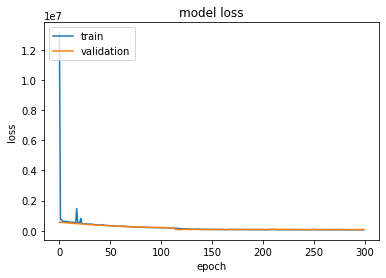

In [30]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [35]:
from tensorflow.keras.optimizers import Adam

def create_model(learning_rate = 0.01, activation = 'relu'):
  
    # Create an Adam optimizer with the given learning rate
    opt = Adam(lr=learning_rate)
  
    # Create your binary classification model  
    model = Sequential()
    model.add(Dense(128, 
                    activation = activation,
                    input_shape = (14, ),
                    activity_regularizer = regularizers.l2(1e-5)))
    model.add(Dropout(0.50))
    model.add(Dense(128,
                    activation = activation, 
                    activity_regularizer = regularizers.l2(1e-5)))
    model.add(Dropout(0.50))
    model.add(Dense(1, activation = activation))
# Compile the model
    model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
    return model

In [36]:
model = KerasRegressor(build_fn=create_model,
                       verbose=1)

params = {'activation': ["relu"],
          'batch_size': [16, 8], 
          'epochs': [200, 300, 500],
          'learning_rate': [0.01, 0.05, 0.1]}

In [37]:
%%time

from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(model,
                                   param_distributions=params, n_jobs=-1)

random_search_results = random_search.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  category=UserWarning


Epoch 1/200
35/35 [==============================] - 1s 3ms/step - loss: 42773504.4722 - mse: 42342606.0278 - mae: 2173.4422
Epoch 2/200
35/35 [==============================] - 0s 3ms/step - loss: 791243.5017 - mse: 343688.2773 - mae: 374.1100
Epoch 3/200
35/35 [==============================] - 0s 3ms/step - loss: 599233.4635 - mse: 163702.1489 - mae: 344.5045
Epoch 4/200
35/35 [==============================] - 0s 3ms/step - loss: 617272.2361 - mse: 175377.5738 - mae: 355.8545
Epoch 5/200
35/35 [==============================] - 0s 3ms/step - loss: 698073.3194 - mse: 281650.0508 - mae: 388.0695
Epoch 6/200
35/35 [==============================] - 0s 3ms/step - loss: 558879.3403 - mse: 175181.8876 - mae: 358.7147
Epoch 7/200
35/35 [==============================] - 0s 3ms/step - loss: 538716.9418 - mse: 201056.2261 - mae: 368.6783
Epoch 8/200
35/35 [==============================] - 0s 3ms/step - loss: 533337.6632 - mse: 215368.9128 - mae: 361.0610
Epoch 9/200
35/35 [================

In [38]:
random_search_results.best_params_

{'learning_rate': 0.1, 'epochs': 200, 'batch_size': 16, 'activation': 'relu'}

In [39]:
nn_tuned = random_search_results.best_estimator_

### XGBoost Regression

In [40]:
!pip install xgboost

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [41]:
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error as MSE
from itertools import product
from sklearn.preprocessing import LabelEncoder

#import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from xgboost import XGBRegressor
from xgboost import plot_importance

def plot_features(booster, figsize):    
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax)

In [42]:
xgbr = XGBRegressor()

xgbr.fit(
    X_train, 
    y_train, 
    eval_metric="mae",  
    verbose=True)

predictions = xgbr.predict(X_test)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error test: " + str(mean_absolute_error(predictions, y_test)))
print("Mean Absolute Error train: " + str(mean_absolute_error(xgbr.predict(X_train), y_train)))

Mean Absolute Error test: 146.64806607495183
Mean Absolute Error train: 1.9142198964305546


In [44]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [45]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [46]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

### Lasso Regression

In [48]:
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso

In [49]:
# define model
lasso_reg = Lasso(alpha=0.0)

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

lasso_reg.fit(X_train, y_train)

pred = lasso_reg.predict(X_test)

#evaluate
scores = cross_val_score(lasso_reg, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# force scores to be positive
scores = absolute(scores)

rmse = np.sqrt(MSE(y_test, pred))
print("RMSE : % f" %(rmse))
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:532: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8429075.139029678, tolerance: 2469.0218836503623
  positive)


RMSE :  191.264376
Mean MAE: 148.480 (10.995)


In [67]:
# grid search hyperparameters for lasso regression
from numpy import arange
from pandas import read_csv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso

# define model
model = Lasso()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)
# define search
lasso_tuned = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
lasso_tuned.fit(X_train, y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])},
             scoring='neg_mean_absolute_error')

### Ridge Regression

In [54]:
# evaluate an ridge regression model on the dataset
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
from matplotlib import pyplot

# define model
ridge_reg = Ridge(alpha=0.00)
# define model evaluation method
ridge_reg.fit(X_train, y_train)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(ridge_reg, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 151.388 (14.254)


In [59]:
from numpy import arange
from sklearn.linear_model import RidgeCV

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
ridge_tune2 = RidgeCV(alphas=arange(0, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')
# fit model
ridge_tune2.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.12581e-26): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.34077e-26): result may not be accurate.
  overwrite_a=True).T


alpha: 0.990000
MAE: -148.477


In [60]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [61]:
sv = svm.SVR()
sv.fit(X_train, y_train)

SVR()

In [68]:
print("Model performance with twitter BERT and news sentiments")
model_performance([xgbr, nn_tuned, lasso_reg, lasso_tuned, ridge_reg, ridge_tune2, rf, sv], ["xgb", 'knn', 'lasso', 'lasso_tuned', 'ridge', 'ridge_tuned', 'rf', 'sv'])

Model performance with twitter BERT and news sentiments
Epoch 1/200
35/35 [==============================] - 1s 3ms/step - loss: 6922489.3542 - mse: 6434120.6319 - mae: 882.6084
Epoch 2/200
35/35 [==============================] - 0s 3ms/step - loss: 699266.3108 - mse: 241484.8941 - mae: 384.5159
Epoch 3/200
35/35 [==============================] - 0s 3ms/step - loss: 625268.2726 - mse: 181392.2821 - mae: 364.6694
Epoch 4/200
35/35 [==============================] - 0s 3ms/step - loss: 582949.5729 - mse: 191810.6068 - mae: 363.0069
Epoch 5/200
35/35 [==============================] - 0s 3ms/step - loss: 599771.9115 - mse: 252850.7834 - mae: 361.4865
Epoch 6/200
35/35 [==============================] - 0s 3ms/step - loss: 640038.4644 - mse: 296787.6419 - mae: 379.9117
Epoch 7/200
35/35 [==============================] - 0s 4ms/step - loss: 518589.7014 - mse: 180482.3694 - mae: 360.0575
Epoch 8/200
35/35 [==============================] - 0s 4ms/step - loss: 497181.3585 - mse: 177047.540

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:532: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8429075.139029678, tolerance: 2469.0218836503623
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.12581e-26): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.34077e-26): result may not be accurate.


Model,xgb,knn,lasso,lasso_tuned,ridge,ridge_tuned,rf,sv
Train: Rsquare,0.999826,-0.606860,0.317213,0.317046,0.269738,0.317213,0.915634,0.031815
Test: Rsquare,0.245519,-0.953065,0.192646,0.194796,0.186403,0.192772,0.371580,-0.007268
Train: MAE,1.914220,220.258390,144.855345,144.935605,145.747793,144.862887,49.725127,179.676587
Test: MAE,146.648066,249.385413,158.859743,158.918618,158.726149,158.852999,138.630163,184.983394
Train: RMSE,2.786383,268.090858,174.757338,174.778740,180.730843,174.757378,61.429472,208.100002
Test: RMSE,184.895446,297.481813,191.264376,191.009485,192.002423,191.249440,168.743556,213.636070
Train: MAPE,1.939257,187.416782,192.887958,190.815668,224.083392,192.753026,54.606607,316.208972
Test: MAPE,79.440023,113.664461,128.551552,129.254625,114.745386,128.589968,84.479601,190.589457


### Feature importance

In [65]:
feature_important_gain = xgbr.get_booster().get_score(importance_type='gain')

<AxesSubplot:>

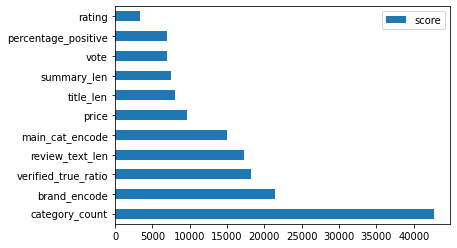

In [66]:
feature_important_gain = xgbr.get_booster().get_score(importance_type='gain')
keys = list(feature_important_gain.keys())
values = list(feature_important_gain.values())

data = pd.DataFrame(data=values, index=keys, columns=['score']).sort_values(by='score', ascending=False)
data.plot(kind='barh')